In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import os
from src.models.detectors.isolation_forest import IsolationForestDetector
from src.models.explainer import FraudExplainer

# Ensure plots are displayed inline
%matplotlib inline

c:\projects\agents\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the detected fraud data
df = pd.read_csv("data/detected_fraud.csv")

# Filter for flagged records
flagged_df = df[df["detected_fraud"] == True]
flagged_indices = flagged_df.index.tolist()

print(f"Total records: {len(df)}")
print(f"Flagged records: {len(flagged_indices)}")
flagged_df.head()

Total records: 510
Flagged records: 10


,customer_id,surname,first_name,address,iban,email,date_of_birth,nationality,is_fraud,fraud_type,detected_fraud,fraud_score,detection_reason,linked_records,cluster_id
8,FRAUD-00000005,Meyers,Sabrina,"89058 Russell Plaza Apt. 482, Fergusonshire, O...",DE50983314659116655355,mmoore@example.com,1998-05-13,German,True,shared_iban,True,0.772194,"shared_iban, same_address, similar_emails; iso...",CUST-00000481; CUST-00000450; CUST-00000476; C...,0
20,FRAUD-00000006,Smith,Jim,"Nohlmansstr. 8/3, 63920 Neu-Ulm",GB52NRRQ91787915059625,kanthony@example.com,2005-12-22,German,True,near_duplicate,True,0.800970,"shared_iban, same_address, similar_emails; iso...",CUST-00000481; CUST-00000450; CUST-00000476; C...,0
73,CUST-00000281,Neuschäfer,Claus-Dieter,"Kohlring 52-12, 99015 Neuruppin",DE06998028413908088235,clausdieterneuschäfer@gmail.com,1987-07-12,German,False,NaN,True,0.706694,"shared_iban, same_address, similar_emails; iso...",CUST-00000481; CUST-00000450; CUST-00000476; C...,0
93,FRAUD-00000002,Cruz,Annelore,"08987 Martinez Plaza, Port Kennethstad, MS 12682",GB17JBXH84531980746823,kyle95@example.net,1969-07-27,German,True,synthetic_identity,True,0.856771,"shared_iban, same_address, similar_emails; iso...",CUST-00000481; CUST-00000450; CUST-00000476; C...,0
122,FRAUD-00000001,Johnson,Samantha,"Janet-Christoph-Platz 39/10, 57134 Wolfratshausen",GB33FSGF88098322101023,pamelasmith@example.net,1980-06-21,German,True,near_duplicate,True,0.818073,"shared_iban, same_address, similar_emails; iso...",CUST-00000481; CUST-00000450; CUST-00000476; C...,0


In [4]:
# Initialize and train the Isolation Forest model
# Note: In a production environment, we would load the saved model.
# Here we retrain to demonstrate the explanation capabilities.
detector = IsolationForestDetector(contamination=0.05, random_state=42)
detector.fit(df)

# Initialize the explainer
explainer = FraudExplainer(detector)

Generating SHAP plots for all flagged instances...

--- Analysis for Record 8 (Customer: FRAUD-00000005) ---


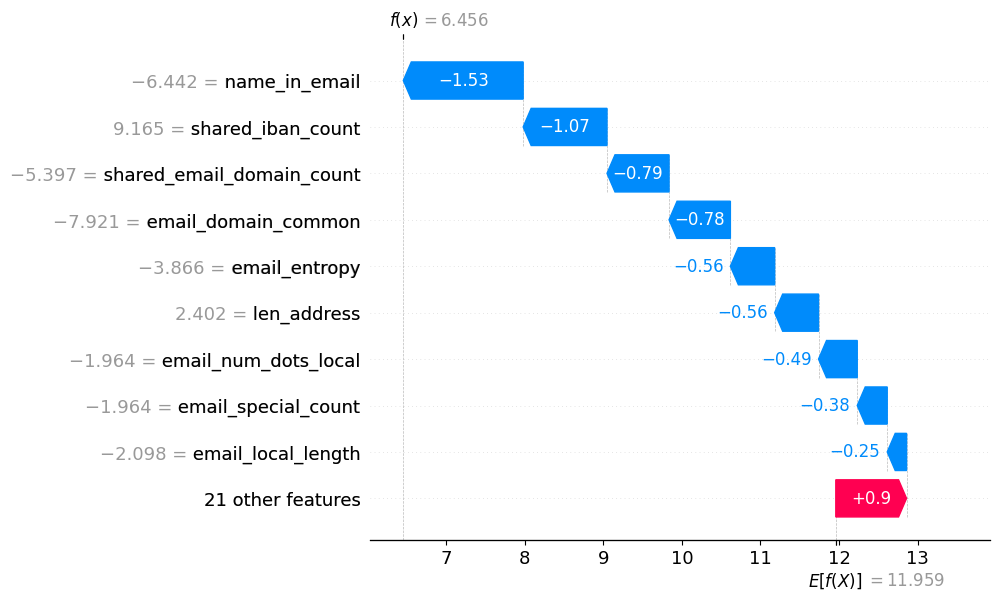


--- Analysis for Record 20 (Customer: FRAUD-00000006) ---


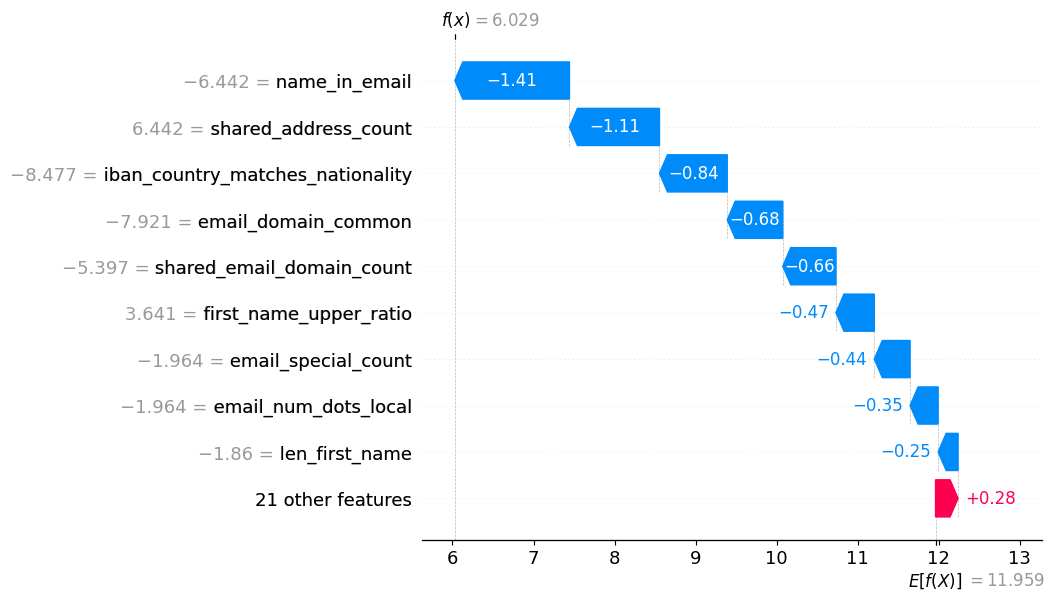


--- Analysis for Record 73 (Customer: CUST-00000281) ---


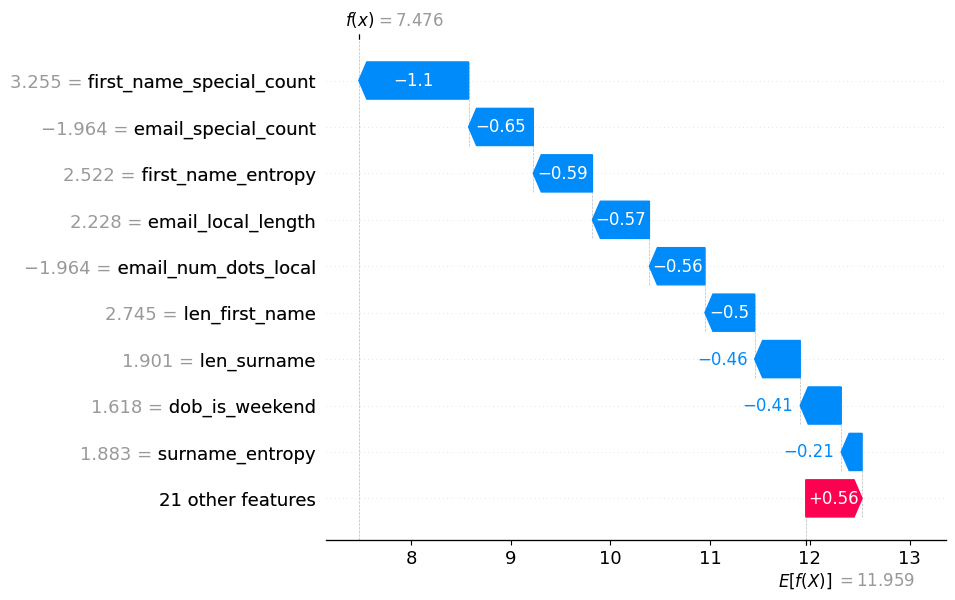


--- Analysis for Record 93 (Customer: FRAUD-00000002) ---


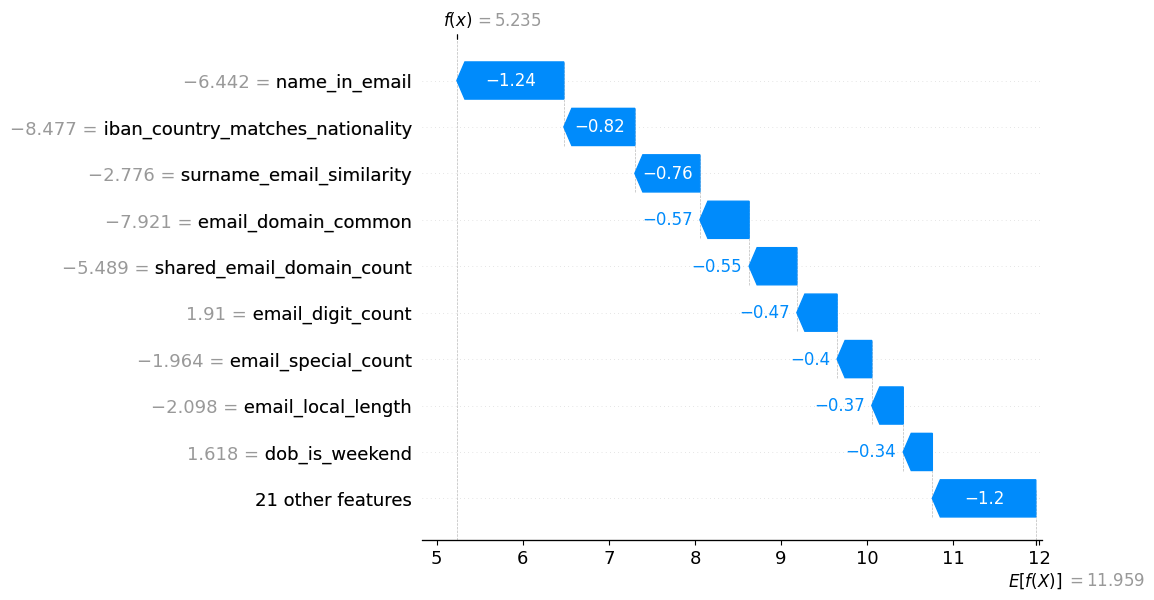


--- Analysis for Record 122 (Customer: FRAUD-00000001) ---


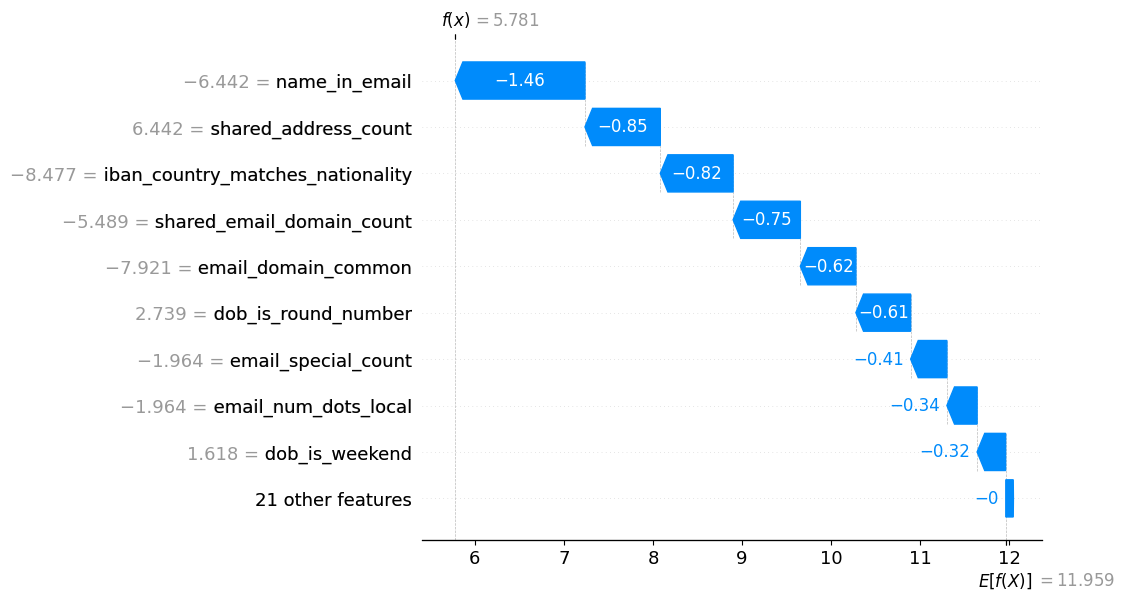


--- Analysis for Record 343 (Customer: FRAUD-00000008) ---


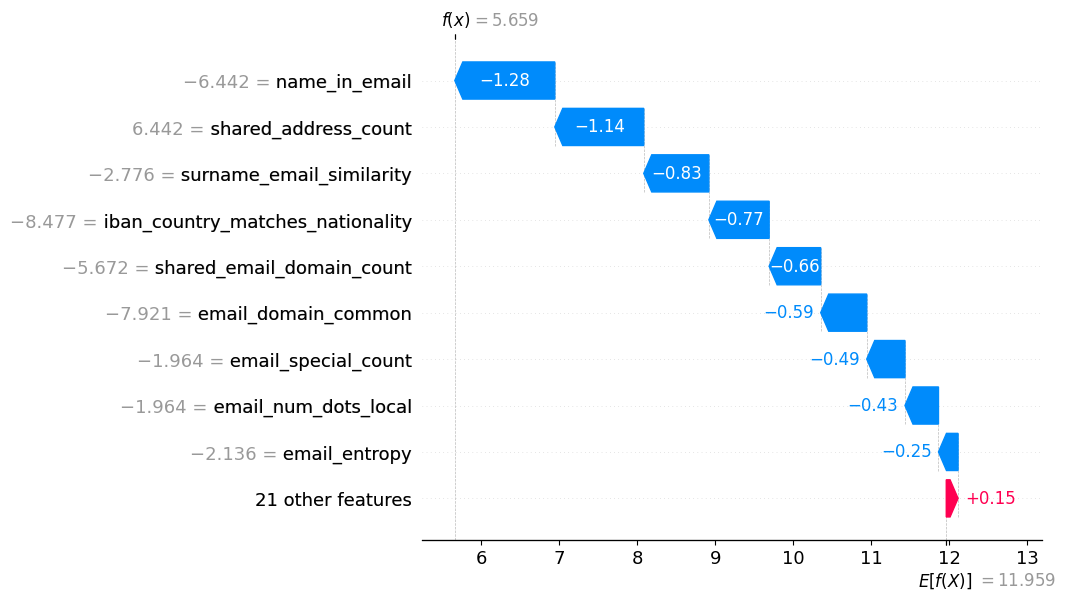


--- Analysis for Record 363 (Customer: FRAUD-00000009) ---


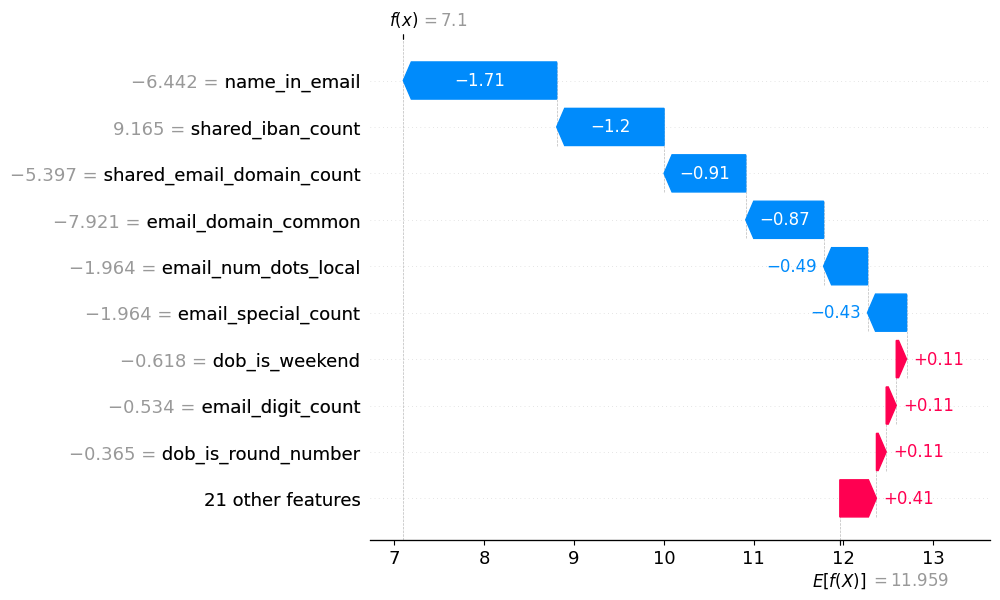


--- Analysis for Record 454 (Customer: FRAUD-00000003) ---


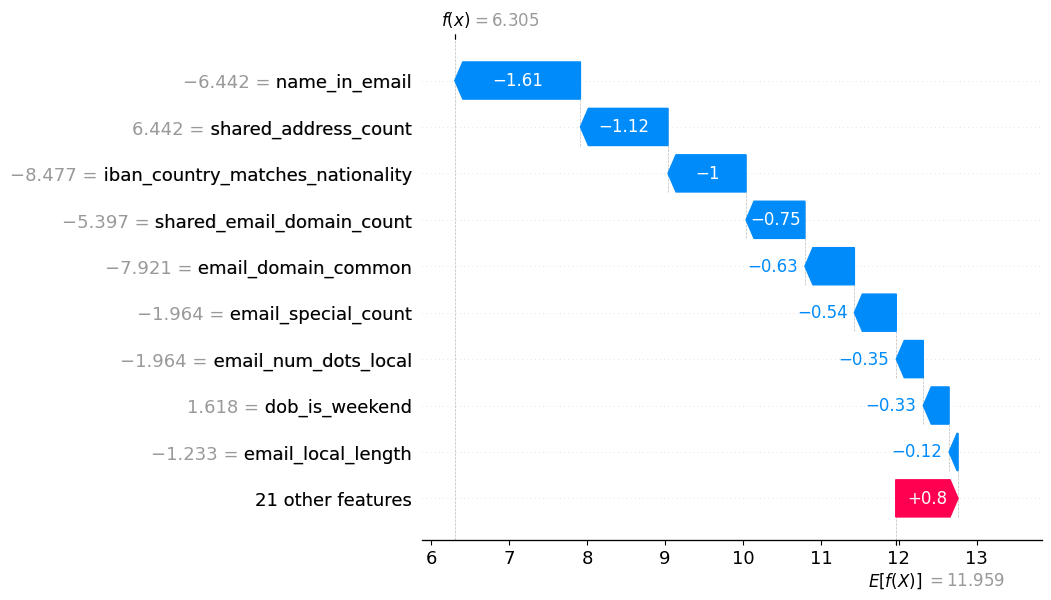


--- Analysis for Record 467 (Customer: FRAUD-00000007) ---


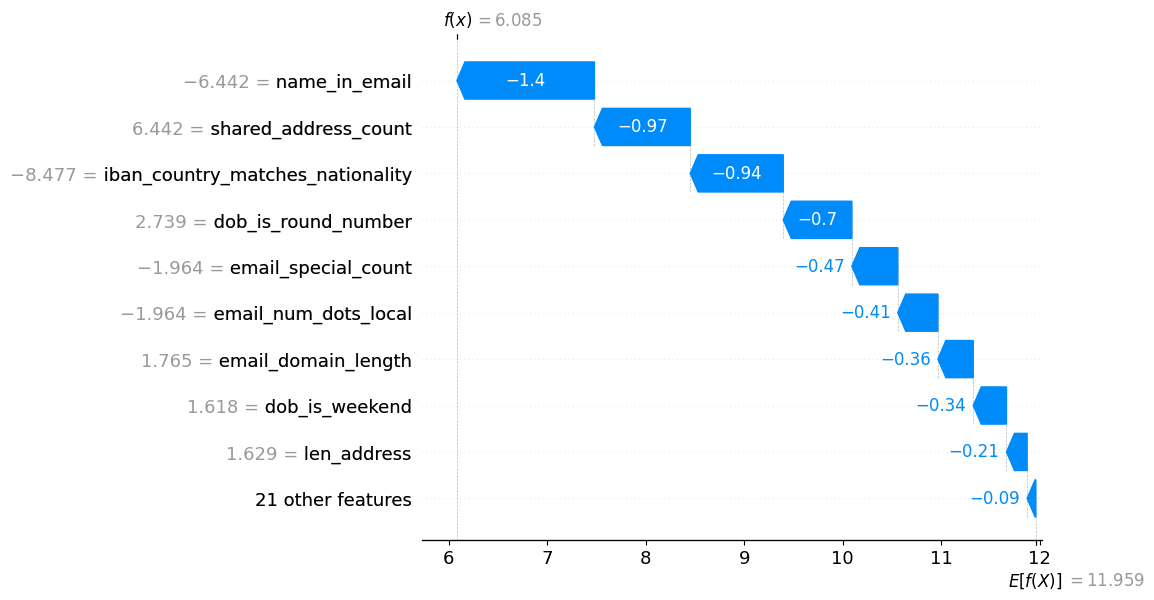


--- Analysis for Record 501 (Customer: FRAUD-00000010) ---


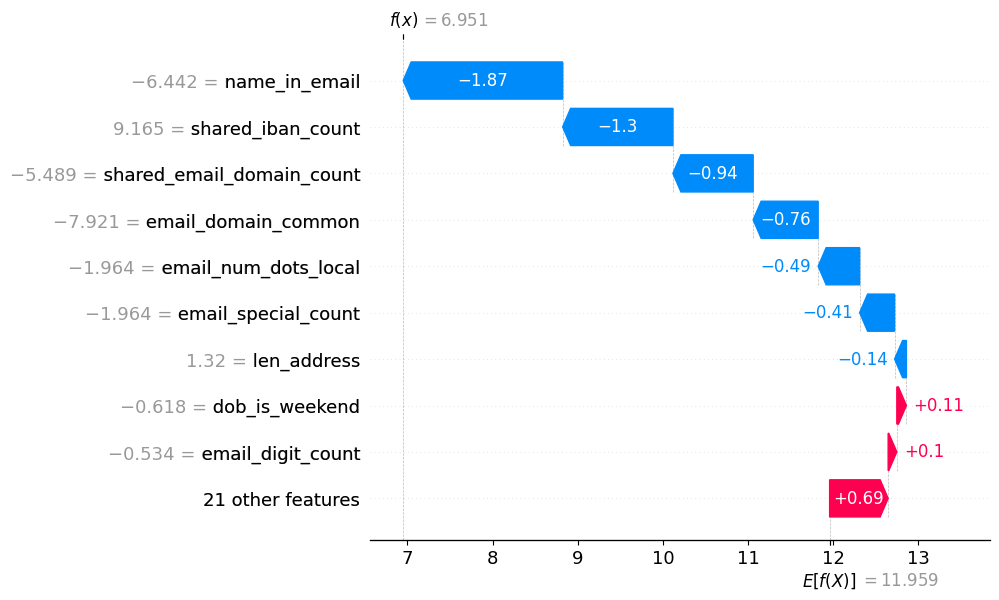

In [5]:
# Generate SHAP plots for all flagged instances
print("Generating SHAP plots for all flagged instances...")

for idx in flagged_indices:
    customer_id = df.loc[idx, "customer_id"]
    print(f"\n--- Analysis for Record {idx} (Customer: {customer_id}) ---")
    
    # Generate and show the plot
    # We use the plot_explanation method we added to the FraudExplainer class
    explainer.plot_explanation(df, idx, show=True)